In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from scipy.special import kl_div
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [77]:
train_data = pd.read_csv('a.csv')
test_data = pd.read_csv('test_1.csv')

In [3]:
for name in train_data.columns:
    if train_data[f'{name}'].dtype == object:
        print(name)
        train_data[name] = train_data[name].astype('category')

In [4]:
print(train_data.columns, len(train_data.columns))

Index(['Unnamed: 0', 'date', 'date__month', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name',
       'shop_name', 'date__day', 'date__week', 'date__day_of_month',
       'date__day_of_week', 'date__week_of_year', 'date__month_of_year',
       'date__year', 'category_cnt_month', 'category_cnt_year',
       'shop_category_cnt_year', 'shop_category_cnt_month',
       'shop_category_cnt_month_avg', 'avg_monthly_sales',
       'category_monthly_avg_sales', 'shop_monthly_avg_sales',
       'item_cnt_month', 'item_cnt_week', 'item_cnt_year', 'is_weekend',
       'is_holiday', 'holidays_in_month', 'amt_weekends_month', 'city',
       'shop_age_month', 'first_sale_date', 'cat_by_shop_age_days',
       'age_group_cat', 'total_sales_month', 'age_group_shop',
       'category_shop_age_months', 'amt_free_days_month', 'season',
       'item_cnt_month_lag_-1', 'item_cnt_month_lag_-2',
       'item_cnt_month_lag_-12', 'item_cnt_month_lag_

In [79]:
'season' in train_data 

True

In [80]:
print(test_data.columns, len(test_data.columns))


Index(['Unnamed: 0', 'date', 'date__month', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name',
       'shop_name', 'date__day', 'date__week', 'date__day_of_month',
       'date__day_of_week', 'date__week_of_year', 'date__month_of_year',
       'date__year', 'category_cnt_month', 'category_cnt_year',
       'shop_category_cnt_year', 'shop_category_cnt_month',
       'avg_monthly_sales', 'category_monthly_avg_sales',
       'shop_monthly_avg_sales', 'is_weekend', 'is_holiday',
       'holidays_in_month', 'amt_weekends_month', 'item_cnt_week',
       'item_cnt_year', 'city', 'category_age_shop', 'category_age_months',
       'shop_age_months', 'amt_free_days_month', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_12',
       'item_cnt_month_lag_-1', 'category_cnt_month_lag_1',
       'category_cnt_month_lag_2', 'category_cnt_month_lag_12',
       'category_cnt_month_lag_-1', 'shop_category_cnt_month_

In [81]:
names = []
for name in train_data.columns:
    if train_data[f'{name}'].dtype == object:
        print(name)
        names.append(name)

date
item_name
item_category_name
shop_name
city
first_sale_date
age_group_cat
age_group_shop
season


In [82]:
for col in names:
    train_data[col] = train_data[col].astype('category')
train_data.dtypes

Unnamed: 0                           int64
date                              category
date__month                          int64
shop_id                              int64
item_id                              int64
                                    ...   
shop_category_cnt_year_lag_-13     float64
shop_monthly_avg_sales_lag_-1      float64
shop_monthly_avg_sales_lag_-2      float64
shop_monthly_avg_sales_lag_-12     float64
shop_monthly_avg_sales_lag_-13     float64
Length: 84, dtype: object

In [83]:
test_data['item_cnt_month'] = [0 for i in range(len(test_data.values))]

In [84]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)


In [46]:
# train_data.dtypes

In [85]:
X_train = train_data.drop(columns=['item_cnt_month'])
y_train = train_data['item_cnt_month']

In [86]:
missing_columns = set(X_train.columns) - set(test_data.columns)
print("Признаки, которых не хватает в тесте:", missing_columns)

Признаки, которых не хватает в тесте: {'shop_category_cnt_year_lag_-13', 'category_monthly_avg_sales_lag_-2', 'shop_category_cnt_month_lag_-12', 'avg_monthly_sales_lag_-12', 'amt_weekends_month_lag_-13', 'holidays_in_month_lag_-2', 'amt_weekends_month_lag_-2', 'shop_monthly_avg_sales_lag_-13', 'shop_category_cnt_month_lag_-13', 'category_cnt_month_lag_-2', 'amt_free_days_month_lag_-13', 'avg_monthly_sales_lag_-2', 'age_group_cat', 'total_sales_month', 'avg_monthly_sales_lag_-13', 'amt_free_days_month_lag_-2', 'amt_weekends_month_lag_-12', 'shop_category_cnt_year_lag_-12', 'category_cnt_month_lag_-12', 'cat_by_shop_age_days', 'amt_free_days_month_lag_-12', 'item_cnt_month_lag_-13', 'shop_age_month', 'first_sale_date', 'shop_category_cnt_month_lag_-2', 'age_group_shop', 'category_monthly_avg_sales_lag_-13', 'category_cnt_month_avg', 'shop_category_cnt_month_avg', 'shop_category_cnt_year_lag_-1', 'category_shop_age_months', 'season', 'holidays_in_month_lag_-12', 'shop_monthly_avg_sales_la

In [87]:
test_data.columns

Index(['Unnamed: 0', 'date', 'date__month', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name',
       'shop_name', 'date__day', 'date__week', 'date__day_of_month',
       'date__day_of_week', 'date__week_of_year', 'date__month_of_year',
       'date__year', 'category_cnt_month', 'category_cnt_year',
       'shop_category_cnt_year', 'shop_category_cnt_month',
       'avg_monthly_sales', 'category_monthly_avg_sales',
       'shop_monthly_avg_sales', 'is_weekend', 'is_holiday',
       'holidays_in_month', 'amt_weekends_month', 'item_cnt_week',
       'item_cnt_year', 'city', 'category_age_shop', 'category_age_months',
       'shop_age_months', 'amt_free_days_month', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_12',
       'item_cnt_month_lag_-1', 'category_cnt_month_lag_1',
       'category_cnt_month_lag_2', 'category_cnt_month_lag_12',
       'category_cnt_month_lag_-1', 'shop_category_cnt_month_

In [88]:
test_data=test_data.drop(['Unnamed: 0'], axis = 1)

In [89]:
missing_columns = set(test_data.columns) - set(X_train.columns)

In [90]:
missing_columns

{'amt_free_days_month_lag_1',
 'amt_free_days_month_lag_12',
 'amt_free_days_month_lag_2',
 'amt_weekends_month_lag_1',
 'amt_weekends_month_lag_12',
 'amt_weekends_month_lag_2',
 'avg_monthly_sales_lag_1',
 'avg_monthly_sales_lag_12',
 'avg_monthly_sales_lag_2',
 'category_age_months',
 'category_age_shop',
 'category_cnt_month_lag_1',
 'category_cnt_month_lag_12',
 'category_cnt_month_lag_2',
 'category_monthly_avg_sales_lag_1',
 'category_monthly_avg_sales_lag_12',
 'category_monthly_avg_sales_lag_2',
 'holidays_in_month_lag_1',
 'holidays_in_month_lag_12',
 'holidays_in_month_lag_2',
 'item_cnt_month',
 'item_cnt_month_lag_1',
 'item_cnt_month_lag_12',
 'item_cnt_month_lag_2',
 'shop_age_months',
 'shop_category_cnt_month_lag_1',
 'shop_category_cnt_month_lag_12',
 'shop_category_cnt_month_lag_2',
 'shop_monthly_avg_sales_lag_1',
 'shop_monthly_avg_sales_lag_12',
 'shop_monthly_avg_sales_lag_2'}

In [91]:
X_test = test_data.copy()

In [54]:
# train_data.dtypes

In [92]:
train_data['avg_monthly_sales'] = train_data['avg_monthly_sales'].replace([np.inf, -np.inf], np.nan)
train_data.describe()


,date__month,shop_id,item_id,item_price,item_cnt_day,item_category_id,date__day,date__week,date__day_of_month,date__day_of_week,...,shop_category_cnt_month_lag_-12,shop_category_cnt_month_lag_-13,shop_category_cnt_year_lag_-1,shop_category_cnt_year_lag_-2,shop_category_cnt_year_lag_-12,shop_category_cnt_year_lag_-13,shop_monthly_avg_sales_lag_-1,shop_monthly_avg_sales_lag_-2,shop_monthly_avg_sales_lag_-12,shop_monthly_avg_sales_lag_-13
count,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,...,484194.000000,462767.000000,964801.000000,884442.000000,484194.000000,462767.000000,964801.000000,884442.000000,484194.000000,462767.000000
mean,1.937746e+01,3.037581e+01,9.373190e+03,9.193812e+02,1.138909e+00,4.020090e+01,6.037005e+02,8.579101e+01,1.609792e+01,3.330432e+00,...,170.119215,171.388666,1462.724811,1505.865943,1728.372303,1739.284134,1545.364369,1587.566077,1835.272365,1849.646643
std,9.160330e+00,1.555579e+01,6.153019e+03,8.943454e+02,4.788792e-01,1.820025e+01,2.787880e+02,3.982778e+01,8.913809e+00,2.004361e+00,...,186.884133,187.802857,1673.258556,1697.617946,1822.391892,1827.578266,1229.796310,1252.189676,1402.841864,1412.972397
min,0.000000e+00,2.000000e+00,3.000000e+01,2.500000e+01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.333333,95.333333,102.666667,102.666667
25%,1.200000e+01,1.900000e+01,4.052000e+03,2.990000e+02,1.000000e+00,2.800000e+01,3.830000e+02,5.400000e+01,8.000000e+00,2.000000e+00,...,50.000000,51.000000,383.000000,411.000000,510.000000,520.000000,739.000000,751.000000,816.333333,817.500000
50%,2.100000e+01,3.100000e+01,7.790000e+03,5.990000e+02,1.000000e+00,3.800000e+01,6.530000e+02,9.300000e+01,1.600000e+01,4.000000e+00,...,113.000000,115.000000,963.000000,995.000000,1169.000000,1196.000000,991.333333,1007.333333,1162.500000,1176.000000
75%,2.700000e+01,4.400000e+01,1.503100e+04,1.199000e+03,1.000000e+00,5.500000e+01,8.300000e+02,1.180000e+02,2.400000e+01,5.000000e+00,...,212.000000,213.000000,1824.000000,1862.000000,2196.000000,2206.000000,2177.000000,2302.666667,2595.333333,2667.666667
max,3.300000e+01,5.900000e+01,2.216700e+04,5.990000e+03,5.000000e+00,8.300000e+01,1.033000e+03,1.470000e+02,3.100000e+01,6.000000e+00,...,1258.000000,1258.000000,10002.000000,10002.000000,10002.000000,10002.000000,7138.000000,7138.000000,7138.000000,7138.000000


In [93]:
train_data['avg_monthly_sales'].min()

28917.666666666668

In [57]:
# train_data = train_data.drop(['inf'], axis = 1)

In [94]:
for col in list(train_data.columns):
    # print(col)
    train_data[f'{col}'] = train_data[f'{col}'].replace([np.inf, -np.inf], np.nan)


In [95]:
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse',
    early_stopping_rounds=10,
    enable_categorical = True,
)


In [96]:

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [97]:
train_data.dtypes


date                              category
date__month                          int64
shop_id                              int64
item_id                              int64
item_price                         float64
                                    ...   
shop_category_cnt_year_lag_-13     float64
shop_monthly_avg_sales_lag_-1      float64
shop_monthly_avg_sales_lag_-2      float64
shop_monthly_avg_sales_lag_-12     float64
shop_monthly_avg_sales_lag_-13     float64
Length: 83, dtype: object

In [98]:
for name, typ in train_data.dtypes:
    print(name)
    if typ == 'object':
        print(name) 

TypeError: cannot unpack non-iterable CategoricalDtype object

In [99]:
model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=True
)


[0]	validation_0-rmse:6.70542
[1]	validation_0-rmse:6.08384
[2]	validation_0-rmse:5.54123
[3]	validation_0-rmse:5.03945
[4]	validation_0-rmse:4.66035
[5]	validation_0-rmse:4.26024
[6]	validation_0-rmse:3.90669
[7]	validation_0-rmse:3.59035
[8]	validation_0-rmse:3.31202
[9]	validation_0-rmse:3.06973
[10]	validation_0-rmse:2.85502
[11]	validation_0-rmse:2.70678
[12]	validation_0-rmse:2.53731
[13]	validation_0-rmse:2.41483
[14]	validation_0-rmse:2.28518
[15]	validation_0-rmse:2.17007
[16]	validation_0-rmse:2.07511
[17]	validation_0-rmse:1.99655
[18]	validation_0-rmse:1.92745
[19]	validation_0-rmse:1.86551
[20]	validation_0-rmse:1.81665
[21]	validation_0-rmse:1.77061
[22]	validation_0-rmse:1.73495
[23]	validation_0-rmse:1.70635
[24]	validation_0-rmse:1.67997
[25]	validation_0-rmse:1.65736
[26]	validation_0-rmse:1.64168
[27]	validation_0-rmse:1.62483
[28]	validation_0-rmse:1.61167
[29]	validation_0-rmse:1.59553
[30]	validation_0-rmse:1.58497
[31]	validation_0-rmse:1.57362
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=10,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
y_pred = model.predict(X_val_split)
rmse = mean_squared_error(y_val_split, y_pred)
print("RMSE:", rmse)
rounded_values = [round(value) for value in y_pred]
rmse = mean_squared_error(y_val_split, rounded_values)
print("RMSE rounded values:", rmse)

RMSE: 1.7681833571928063
RMSE rounded values: 1.8219605305119402


In [101]:
y_pred = model.predict(X_val_split)
rmse = mean_squared_error(y_val_split, y_pred)
print("RMSE:", rmse)
rounded_values = [round(value) for value in y_pred]
rmse_rounded = mean_squared_error(y_val_split, rounded_values)
print("RMSE rounded values:", rmse_rounded)
accuracy = accuracy_score(np.round(y_val_split), np.round(y_pred))
print("Accuracy:", accuracy)


RMSE: 1.7681833571928063
RMSE rounded values: 1.8219605305119402
Accuracy: 0.6491314461515373


In [102]:
obj_dtypes = ['date', 'item_name', 'item_category_name', 'shop_name', 'city']
'date', 'item_name', 'item_category_name', 'shop_name', 'city'
for col in obj_dtypes:
    test_data[col] = test_data[col].astype('category')

In [103]:
for name in test_data.columns:
    if test_data[f'{name}'].dtype == object:
        print(name)

In [104]:
test_data.columns

Index(['date', 'date__month', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name',
       'shop_name', 'date__day', 'date__week', 'date__day_of_month',
       'date__day_of_week', 'date__week_of_year', 'date__month_of_year',
       'date__year', 'category_cnt_month', 'category_cnt_year',
       'shop_category_cnt_year', 'shop_category_cnt_month',
       'avg_monthly_sales', 'category_monthly_avg_sales',
       'shop_monthly_avg_sales', 'is_weekend', 'is_holiday',
       'holidays_in_month', 'amt_weekends_month', 'item_cnt_week',
       'item_cnt_year', 'city', 'category_age_shop', 'category_age_months',
       'shop_age_months', 'amt_free_days_month', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_12',
       'item_cnt_month_lag_-1', 'category_cnt_month_lag_1',
       'category_cnt_month_lag_2', 'category_cnt_month_lag_12',
       'category_cnt_month_lag_-1', 'shop_category_cnt_month_lag_1',
      

In [105]:
len(test_data.columns)

72

In [106]:
test_data.columns

Index(['date', 'date__month', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name',
       'shop_name', 'date__day', 'date__week', 'date__day_of_month',
       'date__day_of_week', 'date__week_of_year', 'date__month_of_year',
       'date__year', 'category_cnt_month', 'category_cnt_year',
       'shop_category_cnt_year', 'shop_category_cnt_month',
       'avg_monthly_sales', 'category_monthly_avg_sales',
       'shop_monthly_avg_sales', 'is_weekend', 'is_holiday',
       'holidays_in_month', 'amt_weekends_month', 'item_cnt_week',
       'item_cnt_year', 'city', 'category_age_shop', 'category_age_months',
       'shop_age_months', 'amt_free_days_month', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_12',
       'item_cnt_month_lag_-1', 'category_cnt_month_lag_1',
       'category_cnt_month_lag_2', 'category_cnt_month_lag_12',
       'category_cnt_month_lag_-1', 'shop_category_cnt_month_lag_1',
      

In [107]:
missing_columns = set(test_data.columns) - set(X_train.columns)
missing_columns

{'amt_free_days_month_lag_1',
 'amt_free_days_month_lag_12',
 'amt_free_days_month_lag_2',
 'amt_weekends_month_lag_1',
 'amt_weekends_month_lag_12',
 'amt_weekends_month_lag_2',
 'avg_monthly_sales_lag_1',
 'avg_monthly_sales_lag_12',
 'avg_monthly_sales_lag_2',
 'category_age_months',
 'category_age_shop',
 'category_cnt_month_lag_1',
 'category_cnt_month_lag_12',
 'category_cnt_month_lag_2',
 'category_monthly_avg_sales_lag_1',
 'category_monthly_avg_sales_lag_12',
 'category_monthly_avg_sales_lag_2',
 'holidays_in_month_lag_1',
 'holidays_in_month_lag_12',
 'holidays_in_month_lag_2',
 'item_cnt_month',
 'item_cnt_month_lag_1',
 'item_cnt_month_lag_12',
 'item_cnt_month_lag_2',
 'shop_age_months',
 'shop_category_cnt_month_lag_1',
 'shop_category_cnt_month_lag_12',
 'shop_category_cnt_month_lag_2',
 'shop_monthly_avg_sales_lag_1',
 'shop_monthly_avg_sales_lag_12',
 'shop_monthly_avg_sales_lag_2'}

In [108]:
test_data = test_data.drop(columns=['item_cnt_month'],axis=1)

In [109]:
missing_columns = set(X_train.columns) - set(test_data.columns)
missing_columns

{'age_group_cat',
 'age_group_shop',
 'amt_free_days_month_lag_-12',
 'amt_free_days_month_lag_-13',
 'amt_free_days_month_lag_-2',
 'amt_weekends_month_lag_-12',
 'amt_weekends_month_lag_-13',
 'amt_weekends_month_lag_-2',
 'avg_monthly_sales_lag_-12',
 'avg_monthly_sales_lag_-13',
 'avg_monthly_sales_lag_-2',
 'cat_by_shop_age_days',
 'category_cnt_month_avg',
 'category_cnt_month_lag_-12',
 'category_cnt_month_lag_-13',
 'category_cnt_month_lag_-2',
 'category_monthly_avg_sales_lag_-12',
 'category_monthly_avg_sales_lag_-13',
 'category_monthly_avg_sales_lag_-2',
 'category_shop_age_months',
 'first_sale_date',
 'holidays_in_month_lag_-12',
 'holidays_in_month_lag_-13',
 'holidays_in_month_lag_-2',
 'item_cnt_month_lag_-12',
 'item_cnt_month_lag_-13',
 'item_cnt_month_lag_-2',
 'season',
 'shop_age_month',
 'shop_category_cnt_month_avg',
 'shop_category_cnt_month_lag_-12',
 'shop_category_cnt_month_lag_-13',
 'shop_category_cnt_month_lag_-2',
 'shop_category_cnt_year_lag_-1',
 'shop

In [110]:
test_pred = model.predict(test_data)

ValueError: feature_names mismatch: ['date', 'date__month', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name', 'shop_name', 'date__day', 'date__week', 'date__day_of_month', 'date__day_of_week', 'date__week_of_year', 'date__month_of_year', 'date__year', 'category_cnt_month', 'category_cnt_month_avg', 'category_cnt_year', 'shop_category_cnt_year', 'shop_category_cnt_month', 'shop_category_cnt_month_avg', 'avg_monthly_sales', 'category_monthly_avg_sales', 'shop_monthly_avg_sales', 'item_cnt_week', 'item_cnt_year', 'is_weekend', 'is_holiday', 'holidays_in_month', 'amt_weekends_month', 'city', 'shop_age_month', 'first_sale_date', 'cat_by_shop_age_days', 'age_group_cat', 'total_sales_month', 'age_group_shop', 'category_shop_age_months', 'amt_free_days_month', 'season', 'amt_free_days_month_lag_-1', 'amt_free_days_month_lag_-2', 'amt_free_days_month_lag_-12', 'amt_free_days_month_lag_-13', 'amt_weekends_month_lag_-1', 'amt_weekends_month_lag_-2', 'amt_weekends_month_lag_-12', 'amt_weekends_month_lag_-13', 'avg_monthly_sales_lag_-1', 'avg_monthly_sales_lag_-2', 'avg_monthly_sales_lag_-12', 'avg_monthly_sales_lag_-13', 'category_cnt_month_lag_-1', 'category_cnt_month_lag_-2', 'category_cnt_month_lag_-12', 'category_cnt_month_lag_-13', 'category_monthly_avg_sales_lag_-1', 'category_monthly_avg_sales_lag_-2', 'category_monthly_avg_sales_lag_-12', 'category_monthly_avg_sales_lag_-13', 'holidays_in_month_lag_-1', 'holidays_in_month_lag_-2', 'holidays_in_month_lag_-12', 'holidays_in_month_lag_-13', 'item_cnt_month_lag_-1', 'item_cnt_month_lag_-2', 'item_cnt_month_lag_-12', 'item_cnt_month_lag_-13', 'shop_category_cnt_month_lag_-1', 'shop_category_cnt_month_lag_-2', 'shop_category_cnt_month_lag_-12', 'shop_category_cnt_month_lag_-13', 'shop_category_cnt_year_lag_-1', 'shop_category_cnt_year_lag_-2', 'shop_category_cnt_year_lag_-12', 'shop_category_cnt_year_lag_-13', 'shop_monthly_avg_sales_lag_-1', 'shop_monthly_avg_sales_lag_-2', 'shop_monthly_avg_sales_lag_-12', 'shop_monthly_avg_sales_lag_-13'] ['date', 'date__month', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name', 'shop_name', 'date__day', 'date__week', 'date__day_of_month', 'date__day_of_week', 'date__week_of_year', 'date__month_of_year', 'date__year', 'category_cnt_month', 'category_cnt_year', 'shop_category_cnt_year', 'shop_category_cnt_month', 'avg_monthly_sales', 'category_monthly_avg_sales', 'shop_monthly_avg_sales', 'is_weekend', 'is_holiday', 'holidays_in_month', 'amt_weekends_month', 'item_cnt_week', 'item_cnt_year', 'city', 'category_age_shop', 'category_age_months', 'shop_age_months', 'amt_free_days_month', 'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_12', 'item_cnt_month_lag_-1', 'category_cnt_month_lag_1', 'category_cnt_month_lag_2', 'category_cnt_month_lag_12', 'category_cnt_month_lag_-1', 'shop_category_cnt_month_lag_1', 'shop_category_cnt_month_lag_2', 'shop_category_cnt_month_lag_12', 'shop_category_cnt_month_lag_-1', 'avg_monthly_sales_lag_1', 'avg_monthly_sales_lag_2', 'avg_monthly_sales_lag_12', 'avg_monthly_sales_lag_-1', 'category_monthly_avg_sales_lag_1', 'category_monthly_avg_sales_lag_2', 'category_monthly_avg_sales_lag_12', 'category_monthly_avg_sales_lag_-1', 'shop_monthly_avg_sales_lag_1', 'shop_monthly_avg_sales_lag_2', 'shop_monthly_avg_sales_lag_12', 'shop_monthly_avg_sales_lag_-1', 'holidays_in_month_lag_1', 'holidays_in_month_lag_2', 'holidays_in_month_lag_12', 'holidays_in_month_lag_-1', 'amt_weekends_month_lag_1', 'amt_weekends_month_lag_2', 'amt_weekends_month_lag_12', 'amt_weekends_month_lag_-1', 'amt_free_days_month_lag_1', 'amt_free_days_month_lag_2', 'amt_free_days_month_lag_12', 'amt_free_days_month_lag_-1']
expected shop_category_cnt_year_lag_-13, category_monthly_avg_sales_lag_-2, shop_category_cnt_month_lag_-12, avg_monthly_sales_lag_-12, amt_weekends_month_lag_-13, holidays_in_month_lag_-2, amt_weekends_month_lag_-2, shop_monthly_avg_sales_lag_-13, shop_category_cnt_month_lag_-13, category_cnt_month_lag_-2, amt_free_days_month_lag_-13, avg_monthly_sales_lag_-2, age_group_cat, total_sales_month, avg_monthly_sales_lag_-13, amt_free_days_month_lag_-2, amt_weekends_month_lag_-12, shop_category_cnt_year_lag_-12, category_cnt_month_lag_-12, cat_by_shop_age_days, amt_free_days_month_lag_-12, item_cnt_month_lag_-13, shop_age_month, first_sale_date, shop_category_cnt_month_lag_-2, age_group_shop, category_monthly_avg_sales_lag_-13, category_cnt_month_avg, shop_category_cnt_month_avg, shop_category_cnt_year_lag_-1, category_shop_age_months, season, holidays_in_month_lag_-12, shop_monthly_avg_sales_lag_-12, holidays_in_month_lag_-13, item_cnt_month_lag_-2, item_cnt_month_lag_-12, category_monthly_avg_sales_lag_-12, category_cnt_month_lag_-13, shop_category_cnt_year_lag_-2, shop_monthly_avg_sales_lag_-2 in input data
training data did not have the following fields: amt_free_days_month_lag_2, category_monthly_avg_sales_lag_1, avg_monthly_sales_lag_2, shop_category_cnt_month_lag_1, avg_monthly_sales_lag_1, item_cnt_month_lag_12, category_cnt_month_lag_2, shop_monthly_avg_sales_lag_12, shop_category_cnt_month_lag_12, amt_weekends_month_lag_2, avg_monthly_sales_lag_12, item_cnt_month_lag_1, category_age_months, category_cnt_month_lag_12, amt_free_days_month_lag_12, category_age_shop, category_monthly_avg_sales_lag_2, holidays_in_month_lag_1, category_monthly_avg_sales_lag_12, shop_monthly_avg_sales_lag_1, holidays_in_month_lag_12, shop_category_cnt_month_lag_2, category_cnt_month_lag_1, item_cnt_month_lag_2, shop_monthly_avg_sales_lag_2, holidays_in_month_lag_2, amt_weekends_month_lag_1, shop_age_months, amt_weekends_month_lag_12, amt_free_days_month_lag_1

In [44]:
test_pred = pd.DataFrame(test_pred)
test_pred.head(10)

,0
0,2.528503
1,2.528503
2,2.528503
3,2.528503
4,2.528503
5,2.528503
6,2.528503
7,2.528503
8,2.528503
9,2.528503


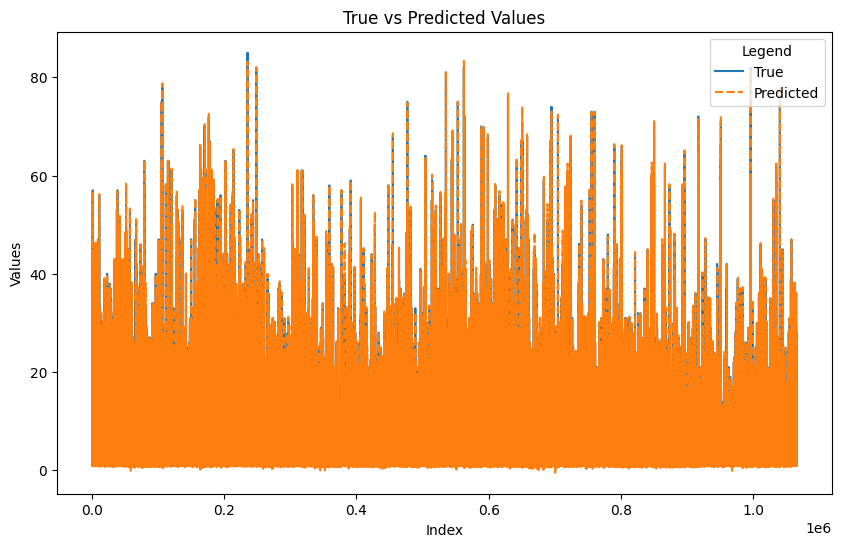

In [41]:
true_values = y_val_split
predicted_values = y_pred

df_comparison = pd.DataFrame({
    'True': true_values,
    'Predicted': predicted_values
})

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_comparison)
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend(title='Legend')
plt.show()

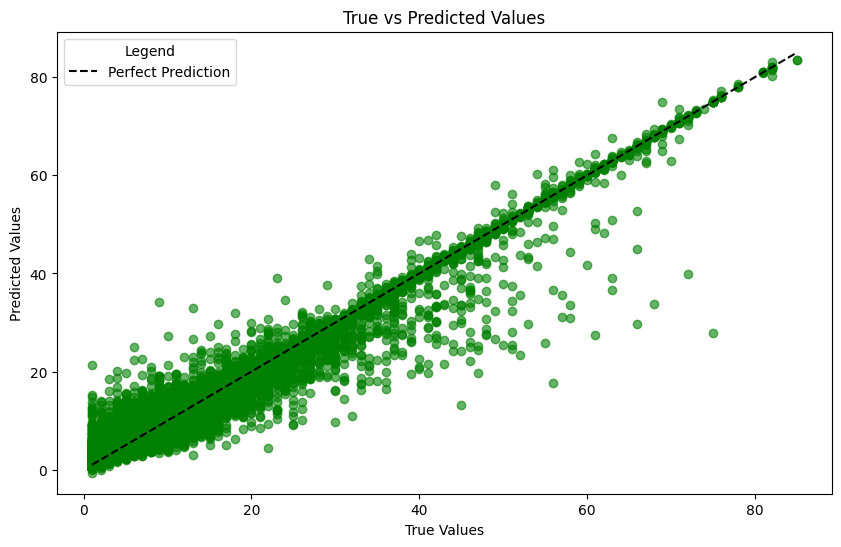

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df_comparison['True'], df_comparison['Predicted'], color='green', alpha=0.6)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([df_comparison['True'].min(), df_comparison['True'].max()],
         [df_comparison['True'].min(), df_comparison['True'].max()],
         'k--', label='Perfect Prediction')
plt.legend(title='Legend')
plt.show()


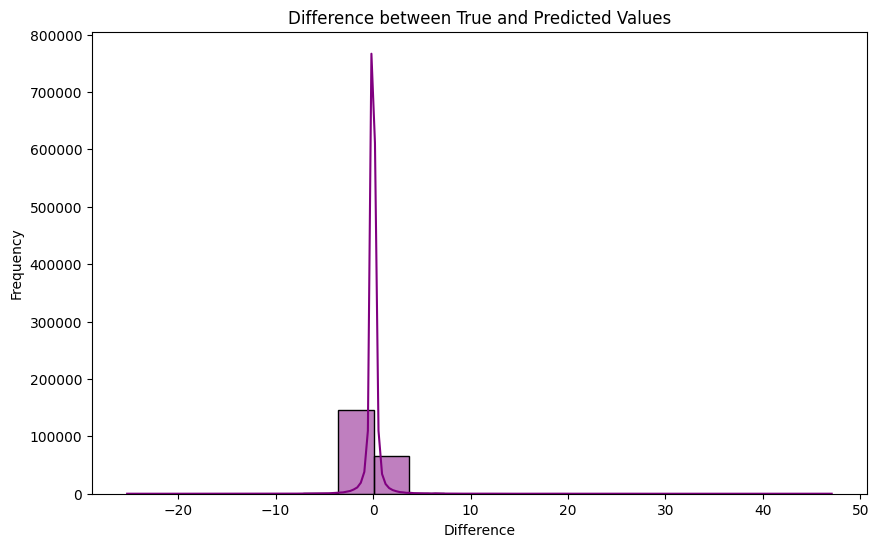

In [28]:
df_comparison['Difference'] = df_comparison['True'] - df_comparison['Predicted']

plt.figure(figsize=(10, 6))
sns.histplot(df_comparison['Difference'], bins=20, kde=True, color='purple')
plt.title('Difference between True and Predicted Values')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


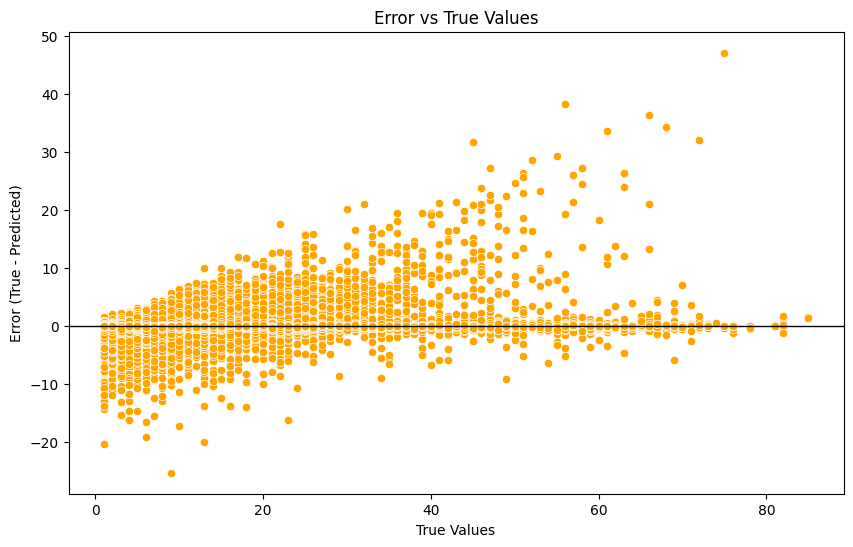

In [29]:
df_comparison['Error'] = df_comparison['True'] - df_comparison['Predicted']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_comparison['True'], y=df_comparison['Error'], color='orange')
plt.axhline(0, color='black', linewidth=1)
plt.title('Error vs True Values')
plt.xlabel('True Values')
plt.ylabel('Error (True - Predicted)')
plt.show()


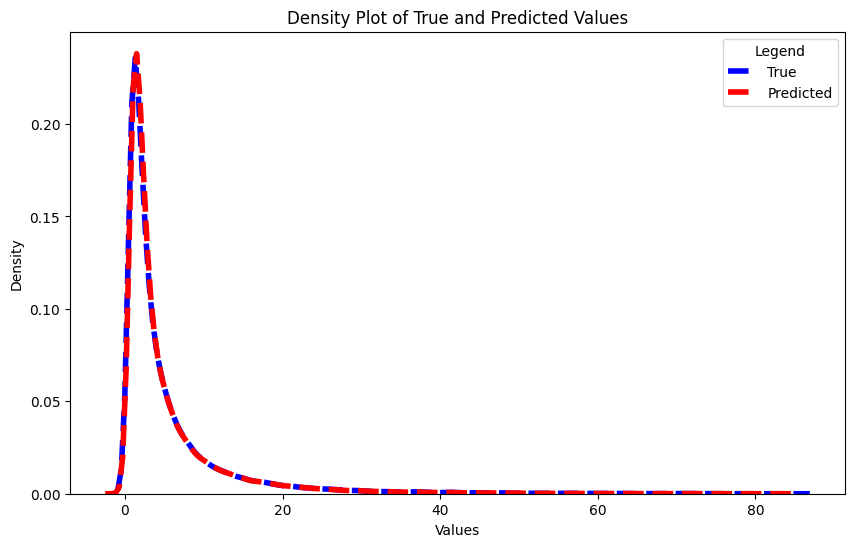

In [34]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_comparison['True'], label='True', color='blue', linewidth=4, linestyle='--')
sns.kdeplot(df_comparison['Predicted'], label='Predicted', color='red',  linewidth=4, linestyle='--')
plt.title('Density Plot of True and Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(title='Legend')
plt.show()


In [26]:
hist_true, bin_edges_true = np.histogram(true_values, bins=10, density=True)
hist_pred, bin_edges_pred = np.histogram(predicted_values, bins=10, density=True)

kl_divergence_1 = np.sum(kl_div(hist_true + 1e-10, hist_pred + 1e-10))


kl_divergence = np.sum(kl_div(hist_pred + 1e-10, hist_true + 1e-10))

print(f"KL дивергенция между истинными и предсказанными распределениями: {kl_divergence_1}")
print(f"KL дивергенция между истинными и предсказанными распределениями: {kl_divergence}")



KL дивергенция между истинными и предсказанными распределениями: 0.0009101321475531906
KL дивергенция между истинными и предсказанными распределениями: 0.0009961645131199277
